# Bezier at work
Make sure you've run `../../gradlew shadowJar` from the `BoatDesign` folder for the imports to work.

In [1]:
%classpath add jar "../build/libs/BoatDesign-1.0-all.jar"

In [17]:
// Verify if the classpath above is taken in account
import gsg.SwingUtils.Box3D;
import gsg.SwingUtils.WhiteBoardPanel;
import gsg.VectorUtils;

import bezier.Bezier;
import boatdesign.threeD.BoatBox3D;

import java.awt.Color;
import java.awt.Font;
import java.awt.Dimension;

In [18]:
System.out.println(String.format("Running from folder %s", System.getProperty("user.dir")));
System.out.println(String.format("Java version %s", System.getProperty("java.version")));

Running from folder /Users/olivierlediouris/repos/raspberry-coffee/Project-Trunk/BoatDesign/jupyter
Java version 11.0.8


The Bezier points

In [19]:
List<List<Double>> railPoints = List.of(
      List.of( 0.000000, 0.000000, 75.000000 ),
      List.of( 0.000000, 21.428571, 75.0 ),
      List.of(69.642857, 86.785714, 47.500000 ),
      List.of(305.357143, 156.428571, 45.357143 ),
      List.of(550.000000, 65.0, 56.000000 ));

List<List<Double>> keelPoints = List.of(
      List.of( 5.000000, 0.000000, -2.000000 ),
      List.of( 300.0, 0.000000, -45.0 ),
      List.of( 550.000000, 0.000000, 10.000000 ));

Points to Bezier Control Points

In [20]:
List<Bezier.Point3D> railCtrlPoints = new ArrayList<>();
List<Bezier.Point3D> keelCtrlPoints = new ArrayList<>();

// Rail
railPoints.forEach(pt -> {
    railCtrlPoints.add(new Bezier.Point3D(pt.get(0), pt.get(1), pt.get(2)));
});
// Keel
keelPoints.forEach(pt -> {
    keelCtrlPoints.add(new Bezier.Point3D(pt.get(0), pt.get(1), pt.get(2)));
});

In [21]:
WhiteBoardPanel whiteBoardXY = new WhiteBoardPanel(); // from above
WhiteBoardPanel whiteBoardXZ = new WhiteBoardPanel(); // side
WhiteBoardPanel whiteBoardYZ = new WhiteBoardPanel(); // facing
BoatBox3D box3D = new BoatBox3D();

In [22]:
box3D.setRailCtrlPoints(railCtrlPoints); // The rail.
box3D.setKeelCtrlPoints(keelCtrlPoints); // The keel.

In [23]:
// Override defaults (not mandatory)
// XY
whiteBoardXY.setAxisColor(Color.BLACK);
whiteBoardXY.setGridColor(Color.GRAY);
whiteBoardXY.setForceTickIncrement(50);
whiteBoardXY.setEnforceXAxisAt(0d);
whiteBoardXY.setEnforceYAxisAt(0d);

whiteBoardXY.setWithGrid(true);
whiteBoardXY.setBgColor(new Color(250, 250, 250, 255));
whiteBoardXY.setGraphicTitle(null); // "X not equals Y, Y ampl enforced [0, 100]");
whiteBoardXY.setSize(new Dimension(800, 200));
whiteBoardXY.setPreferredSize(new Dimension(600, 200));
whiteBoardXY.setTextColor(Color.RED);
whiteBoardXY.setTitleFont(new Font("Arial", Font.BOLD | Font.ITALIC, 32));
whiteBoardXY.setGraphicMargins(30);
whiteBoardXY.setXEqualsY(true); // false);
// Enforce Y amplitude
whiteBoardXY.setForcedMinY(0d);
whiteBoardXY.setForcedMaxY(150d);

// XZ
whiteBoardXZ.setAxisColor(Color.BLACK);
whiteBoardXZ.setGridColor(Color.GRAY);
whiteBoardXZ.setForceTickIncrement(50);
whiteBoardXZ.setEnforceXAxisAt(0d);
whiteBoardXZ.setEnforceYAxisAt(0d);

whiteBoardXZ.setWithGrid(true);
whiteBoardXZ.setBgColor(new Color(250, 250, 250, 255));
whiteBoardXZ.setGraphicTitle(null); // "X not equals Y, Y ampl enforced [0, 100]");
whiteBoardXZ.setSize(new Dimension(800, 200));
whiteBoardXZ.setPreferredSize(new Dimension(600, 200));
whiteBoardXZ.setTextColor(Color.RED);
whiteBoardXZ.setTitleFont(new Font("Arial", Font.BOLD | Font.ITALIC, 32));
whiteBoardXZ.setGraphicMargins(30);
whiteBoardXZ.setXEqualsY(true); // false);
// Enforce Y amplitude
whiteBoardXZ.setForcedMinY(-50d);
whiteBoardXZ.setForcedMaxY(100d);

// YZ
whiteBoardYZ.setAxisColor(Color.BLACK);
whiteBoardYZ.setGridColor(Color.GRAY);
whiteBoardYZ.setForceTickIncrement(50);
whiteBoardYZ.setEnforceXAxisAt(0d);
whiteBoardYZ.setEnforceYAxisAt(0d);

whiteBoardYZ.setWithGrid(true);
whiteBoardYZ.setBgColor(new Color(250, 250, 250, 255));
whiteBoardYZ.setGraphicTitle(null); // "X not equals Y, Y ampl enforced [0, 100]");
whiteBoardYZ.setSize(new Dimension(400, 200));
whiteBoardYZ.setPreferredSize(new Dimension(400, 200));
whiteBoardYZ.setTextColor(Color.RED);
whiteBoardYZ.setTitleFont(new Font("Arial", Font.BOLD | Font.ITALIC, 32));
whiteBoardYZ.setGraphicMargins(30);
whiteBoardYZ.setXEqualsY(true); // false);
// Enforce Y amplitude
whiteBoardYZ.setForcedMinY(-50d);
whiteBoardYZ.setForcedMaxY(100d);

Prepare the data to display

In [26]:
// Generate the data, the Bézier curve(s).

// 1 - Rail Ctrl Points
Bezier railBezier = new Bezier(railCtrlPoints);
List<VectorUtils.Vector3D> bezierRailPoints = new ArrayList<>(); // The points to display.
if (railCtrlPoints.size() > 2) { // 3 points minimum.
    for (double t = 0; t <= 1.0; t += 1E-3) {
        Bezier.Point3D tick = railBezier.getBezierPoint(t);
        // System.out.println(String.format("%.03f: %s", t, tick.toString()));
        bezierRailPoints.add(new VectorUtils.Vector3D(tick.getX(), tick.getY(), tick.getZ()));
    }
}
double[] xRailCtrlPoints = railCtrlPoints.stream()
        .mapToDouble(bp -> bp.getX())
        .toArray();
double[] yRailCtrlPoints = railCtrlPoints.stream()
        .mapToDouble(bp -> bp.getY())
        .toArray();
double[] zRailCtrlPoints = railCtrlPoints.stream()
        .mapToDouble(bp -> bp.getZ())
        .toArray();
List<VectorUtils.Vector2D> railCtrlPtsXYVectors = new ArrayList<>();
for (int i = 0; i < xRailCtrlPoints.length; i++) {
    railCtrlPtsXYVectors.add(new VectorUtils.Vector2D(xRailCtrlPoints[i], yRailCtrlPoints[i]));
}
List<VectorUtils.Vector2D> railCtrlPtsXZVectors = new ArrayList<>();
for (int i = 0; i < xRailCtrlPoints.length; i++) {
    railCtrlPtsXZVectors.add(new VectorUtils.Vector2D(xRailCtrlPoints[i], zRailCtrlPoints[i]));
}
List<VectorUtils.Vector2D> railCtrlPtsYZVectors = new ArrayList<>();
for (int i = 0; i < yRailCtrlPoints.length; i++) {
    railCtrlPtsYZVectors.add(new VectorUtils.Vector2D(yRailCtrlPoints[i], zRailCtrlPoints[i]));
}

// Curve points
double[] xData = bezierRailPoints.stream()
        .mapToDouble(bp -> bp.getX())
        .toArray();
double[] yData = bezierRailPoints.stream()
        .mapToDouble(bp -> bp.getY())
        .toArray();
double[] zData = bezierRailPoints.stream()
        .mapToDouble(bp -> bp.getZ())
        .toArray();
List<VectorUtils.Vector2D> railDataXYVectors = new ArrayList<>();
for (int i = 0; i < xData.length; i++) {
    railDataXYVectors.add(new VectorUtils.Vector2D(xData[i], yData[i]));
}
List<VectorUtils.Vector2D> railDataXZVectors = new ArrayList<>();
for (int i = 0; i < xData.length; i++) {
    railDataXZVectors.add(new VectorUtils.Vector2D(xData[i], zData[i]));
}
List<VectorUtils.Vector2D> railDataYZVectors = new ArrayList<>();
for (int i = 0; i < yData.length; i++) {
    railDataYZVectors.add(new VectorUtils.Vector2D(yData[i], zData[i]));
}
// 2 - Keel Ctrl Points
Bezier keelBezier = new Bezier(keelCtrlPoints);
List<VectorUtils.Vector3D> bezierKeelPoints = new ArrayList<>(); // The points to display.
if (keelCtrlPoints.size() > 2) { // 3 points minimum.
    for (double t = 0; t <= 1.0; t += 1E-3) {
        Bezier.Point3D tick = keelBezier.getBezierPoint(t);
        // System.out.println(String.format("%.03f: %s", t, tick.toString()));
        bezierKeelPoints.add(new VectorUtils.Vector3D(tick.getX(), tick.getY(), tick.getZ()));
    }
}
double[] xKeelCtrlPoints = keelCtrlPoints.stream()
        .mapToDouble(bp -> bp.getX())
        .toArray();
double[] yKeelCtrlPoints = keelCtrlPoints.stream()
        .mapToDouble(bp -> bp.getY())
        .toArray();
double[] zKeelCtrlPoints = keelCtrlPoints.stream()
        .mapToDouble(bp -> bp.getZ())
        .toArray();
List<VectorUtils.Vector2D> keelCtrlPtsXYVectors = new ArrayList<>();
for (int i = 0; i < xKeelCtrlPoints.length; i++) {
    keelCtrlPtsXYVectors.add(new VectorUtils.Vector2D(xKeelCtrlPoints[i], yKeelCtrlPoints[i]));
}
List<VectorUtils.Vector2D> keelCtrlPtsXZVectors = new ArrayList<>();
for (int i = 0; i < xKeelCtrlPoints.length; i++) {
    keelCtrlPtsXZVectors.add(new VectorUtils.Vector2D(xKeelCtrlPoints[i], zKeelCtrlPoints[i]));
}
List<VectorUtils.Vector2D> keelCtrlPtsYZVectors = new ArrayList<>();
for (int i = 0; i < yKeelCtrlPoints.length; i++) {
    keelCtrlPtsYZVectors.add(new VectorUtils.Vector2D(yKeelCtrlPoints[i], zKeelCtrlPoints[i]));
}

// Curve points
xData = bezierKeelPoints.stream()
        .mapToDouble(bp -> bp.getX())
        .toArray();
yData = bezierKeelPoints.stream()
        .mapToDouble(bp -> bp.getY())
        .toArray();
zData = bezierKeelPoints.stream()
        .mapToDouble(bp -> bp.getZ())
        .toArray();
List<VectorUtils.Vector2D> keelDataXYVectors = new ArrayList<>();
for (int i = 0; i < xData.length; i++) {
    keelDataXYVectors.add(new VectorUtils.Vector2D(xData[i], yData[i]));
}
List<VectorUtils.Vector2D> keelDataXZVectors = new ArrayList<>();
for (int i = 0; i < xData.length; i++) {
    keelDataXZVectors.add(new VectorUtils.Vector2D(xData[i], zData[i]));
}
List<VectorUtils.Vector2D> keelDataYZVectors = new ArrayList<>();
for (int i = 0; i < yData.length; i++) {
    keelDataYZVectors.add(new VectorUtils.Vector2D(yData[i], zData[i]));
}

whiteBoardXY.resetAllData();
whiteBoardXZ.resetAllData();
whiteBoardYZ.resetAllData();

// Bezier ctrl points series
// XY - Rail
WhiteBoardPanel.DataSerie railCtrlXYSerie = new WhiteBoardPanel.DataSerie()
        .data(railCtrlPtsXYVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardXY.addSerie(railCtrlXYSerie);
// XY - Keel
WhiteBoardPanel.DataSerie keelCtrlXYSerie = new WhiteBoardPanel.DataSerie()
        .data(keelCtrlPtsXYVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardXY.addSerie(keelCtrlXYSerie);

// XZ - Rail
WhiteBoardPanel.DataSerie railCtrlXZSerie = new WhiteBoardPanel.DataSerie()
        .data(railCtrlPtsXZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardXZ.addSerie(railCtrlXZSerie);
// XZ - Keel
WhiteBoardPanel.DataSerie keelCtrlXZSerie = new WhiteBoardPanel.DataSerie()
        .data(keelCtrlPtsXZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardXZ.addSerie(keelCtrlXZSerie);

// YZ - Rail
WhiteBoardPanel.DataSerie railCtrlYZSerie = new WhiteBoardPanel.DataSerie()
        .data(railCtrlPtsYZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardYZ.addSerie(railCtrlYZSerie);
// YZ - Keel
WhiteBoardPanel.DataSerie keelCtrlYZSerie = new WhiteBoardPanel.DataSerie()
        .data(keelCtrlPtsYZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE_WITH_DOTS)
        .lineThickness(1)
        .color(Color.ORANGE);
whiteBoardYZ.addSerie(keelCtrlYZSerie);

// Bezier points series
// XY - Rail
WhiteBoardPanel.DataSerie railDataXYSerie = new WhiteBoardPanel.DataSerie()
        .data(railDataXYVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardXY.addSerie(railDataXYSerie);
// XY - Keel
WhiteBoardPanel.DataSerie keelDataXYSerie = new WhiteBoardPanel.DataSerie()
        .data(keelDataXYVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardXY.addSerie(keelDataXYSerie);

// XZ - Rail
WhiteBoardPanel.DataSerie railDataXZSerie = new WhiteBoardPanel.DataSerie()
        .data(railDataXZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardXZ.addSerie(railDataXZSerie);
// XZ - Keel
WhiteBoardPanel.DataSerie keelDataXZSerie = new WhiteBoardPanel.DataSerie()
        .data(keelDataXZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardXZ.addSerie(keelDataXZSerie);

// YZ - Rail
WhiteBoardPanel.DataSerie railDataYZSerie = new WhiteBoardPanel.DataSerie()
        .data(railDataYZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardYZ.addSerie(railDataYZSerie);
// YZ - Keel
WhiteBoardPanel.DataSerie keelDataYZSerie = new WhiteBoardPanel.DataSerie()
        .data(keelDataYZVectors)
        .graphicType(WhiteBoardPanel.GraphicType.LINE)
        .lineThickness(3)
        .color(Color.BLUE);
whiteBoardYZ.addSerie(keelDataYZSerie);

### First display

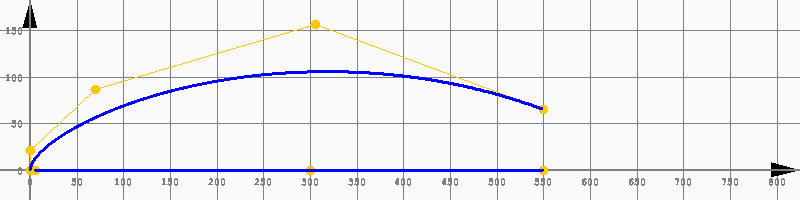

In [27]:
whiteBoardXY.getImage();  // This is for a Jupyter Notebook context

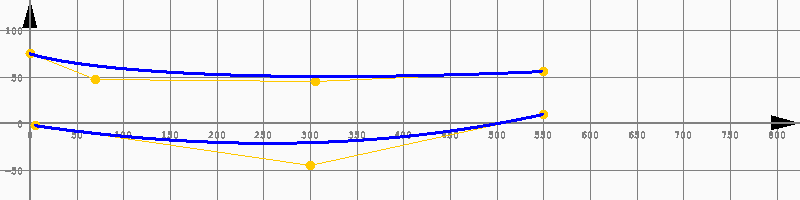

In [28]:
whiteBoardXZ.getImage();  // This is for a Jupyter Notebook context

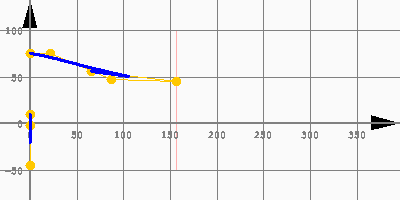

In [29]:
whiteBoardYZ.getImage();  // This is for a Jupyter Notebook context

In [32]:
box3D.repaint();
box3D.refreshData();

From Z Displ: 0.675 m3
Disp on Z: 0.67506 m3, zCC: -0.129 m


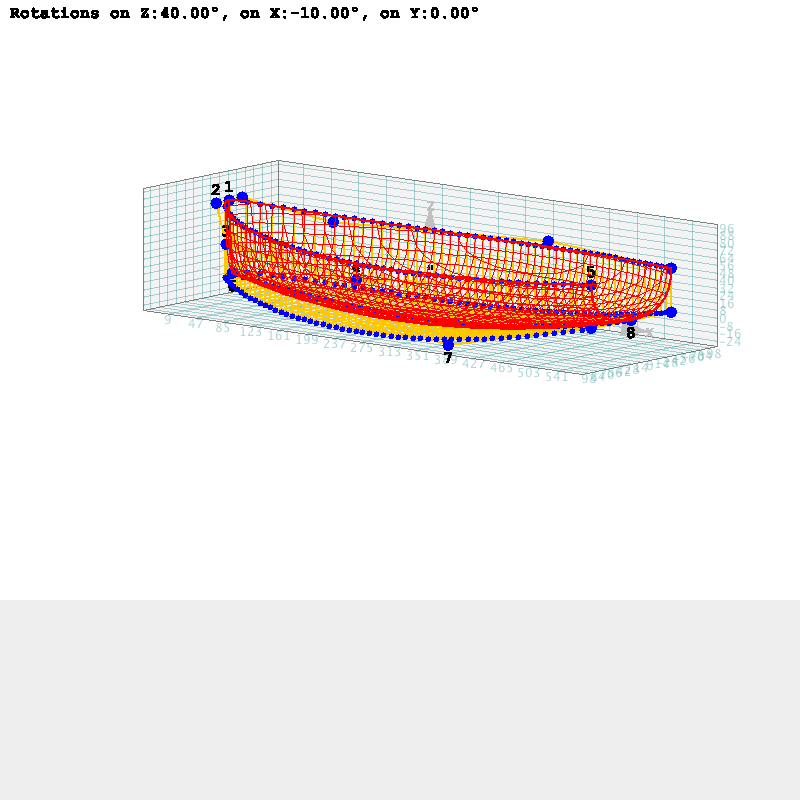

In [33]:
box3D.getImage();